In [2]:
import os
import json
import numpy as np
import math

base_path = "/HDD16TB/weisi/logs"
Task = 'BioASQ_alltypes_exact_new'
options = ['T1-T1', 'T1-T2', 'T1-T3', 'T1-T4', 'T2-T1','T2-T2', 'T2-T3', 'T2-T4',  'T3-T1', 'T3-T2','T3-T3', 'T3-T4','T4-T1','T4-T2','T4-T3', 'T4-T4']
model_name = 't5-base'
folder_name='b4a1_sd42_3e-4_maxanslen30_20epc'
seeds = range(1, 6)
# Adjusted metrics to focus on
metrics = ["rougeL", "meteor", "Geometric_Average_Precision"]  # Assuming rouge1 as an example for simplicity
#/HDD16TB/weisi/logs/BioASQ_alltypes_exact_new/t5-base/T2_T1/split_seed2/b4a1_sd42_3e-4_maxanslen30_20epc/predict_results.json
# Initialize matrix for each metric
performance_matrices = {metric: np.zeros((4, 4)) for metric in metrics}

for metric in metrics:
    for i in range(1, 5):  # D1 to D4
        for j in range(1, 5):  # D1 to D4
            values = []
            for seed in seeds:
                option = f'T{i}-T{j}'
                file_path = os.path.join(base_path, Task, model_name, option.replace('-', '_'), f"split_seed{seed}", folder_name, "predict_results.json")
                with open(file_path, 'r') as file:
                    data = json.load(file)
                    if metric == "rougeL":
                        value = data['test_rouge']['rougeL']
                    elif metric == "meteor":
                        value = data['test_meteor']['meteor']
                    elif metric == "Geometric_Average_Precision":
                        precisions = data['test_bleu']['precisions']
                        log_precisions = [math.log(p) for p in precisions if p > 0]
                        if log_precisions:  # Ensure there are non-zero precisions
                            avg_log_precision = sum(log_precisions) / len(log_precisions)
                            value = math.exp(avg_log_precision)
                        else:
                            value = 0
                    values.append(value)
            # Save 5 seeds mean for the metric
            performance_matrices[metric][j-1, i-1] = np.mean(values)

#bioasq_performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}
bioasq_performance_change_matrices = {}
for metric, matrix in performance_matrices.items():
    change_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            change_matrix[i, j] = matrix[i, j] - matrix[i, i]  
    bioasq_performance_change_matrices[metric] = change_matrix

bioasq_performance_change_vecs = {metric: matrix.flatten() for metric, matrix in bioasq_performance_change_matrices.items()}



In [3]:

base_path = "/HDD16TB/weisi/logs"
Task = 'Mimic'

options = ['T1-T1', 'T1-T2', 'T1-T3', 'T1-T4', 'T2-T1','T2-T2', 'T2-T3', 'T2-T4',  'T3-T1', 'T3-T2','T3-T3', 'T3-T4','T4-T1','T4-T2','T4-T3', 'T4-T4']
model_name = 'bert-base-uncased'
seeds = range(1, 6)
metrics = ["predict_micro_f1", "predict_micro_precision", "predict_micro_recall"]

performance_matrices = {metric: np.zeros((4, 4)) for metric in metrics}

for metric in metrics:
    for i in range(1, 5):  # D1 to D4
        for j in range(1, 5):  # D1 to D4
            values = []
            for seed in seeds:
                option = f'T{i}-T{j}'
                file_path = os.path.join(base_path, Task, model_name, option.replace('-', '_'), f"split_seed{seed}", "model_seed_42_3e-5_20epc", "predict_results.json")
                with open(file_path, 'r') as file:
                    data = json.load(file)
                    values.append(data[metric])
            # save 5 seeds mean
            performance_matrices[metric][j-1, i-1] = np.mean(values)
performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}

mimic_performance_change_matrices = {}
for metric, matrix in performance_matrices.items():
    change_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            change_matrix[i, j] = matrix[i, j] - matrix[i, i]  
    mimic_performance_change_matrices[metric] = change_matrix

mimic_performance_change_vecs = {metric: matrix.flatten() for metric, matrix in mimic_performance_change_matrices.items()}




In [5]:

base_path = "/HDD16TB/weisi/logs"
Task = 'BioNER_Protein_IOBES'
options = ['D1-D1', 'D1-D2', 'D1-D3', 'D1-D4', 'D2-D1', 'D2-D2', 'D2-D3', 'D2-D4', 'D3-D1', 'D3-D2', 'D3-D3', 'D3-D4', 'D4-D1', 'D4-D2', 'D4-D3', 'D4-D4']
model_name = 'bert-base-cased'
seeds = range(1, 6)
metrics = ["predict_micro_f1", "predict_micro_precision", "predict_micro_recall"]

performance_matrices = {metric: np.zeros((4, 4)) for metric in metrics}

for metric in metrics:
    for i in range(1, 5):  # D1 to D4
        for j in range(1, 5):  # D1 to D4
            values = []
            for seed in seeds:
                option = f'D{i}-D{j}'
                file_path = os.path.join(base_path, Task, option.replace('-', '_'), model_name, f"split_seed{seed}", "model_seed_42_3e-5_20epc", "predict_results.json")
                with open(file_path, 'r') as file:
                    data = json.load(file)
                    values.append(data[metric])
            # save 5 seeds mean
            performance_matrices[metric][j-1, i-1] = np.mean(values)

performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}
bioner_performance_change_matrices = {}
for metric, matrix in performance_matrices.items():
    change_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            change_matrix[i, j] = matrix[i, j] - matrix[i, i]  
    bioner_performance_change_matrices[metric] = change_matrix

bioner_performance_change_vecs = {metric: matrix.flatten() for metric, matrix in bioner_performance_change_matrices.items()}


0.0 0.5651288604116391


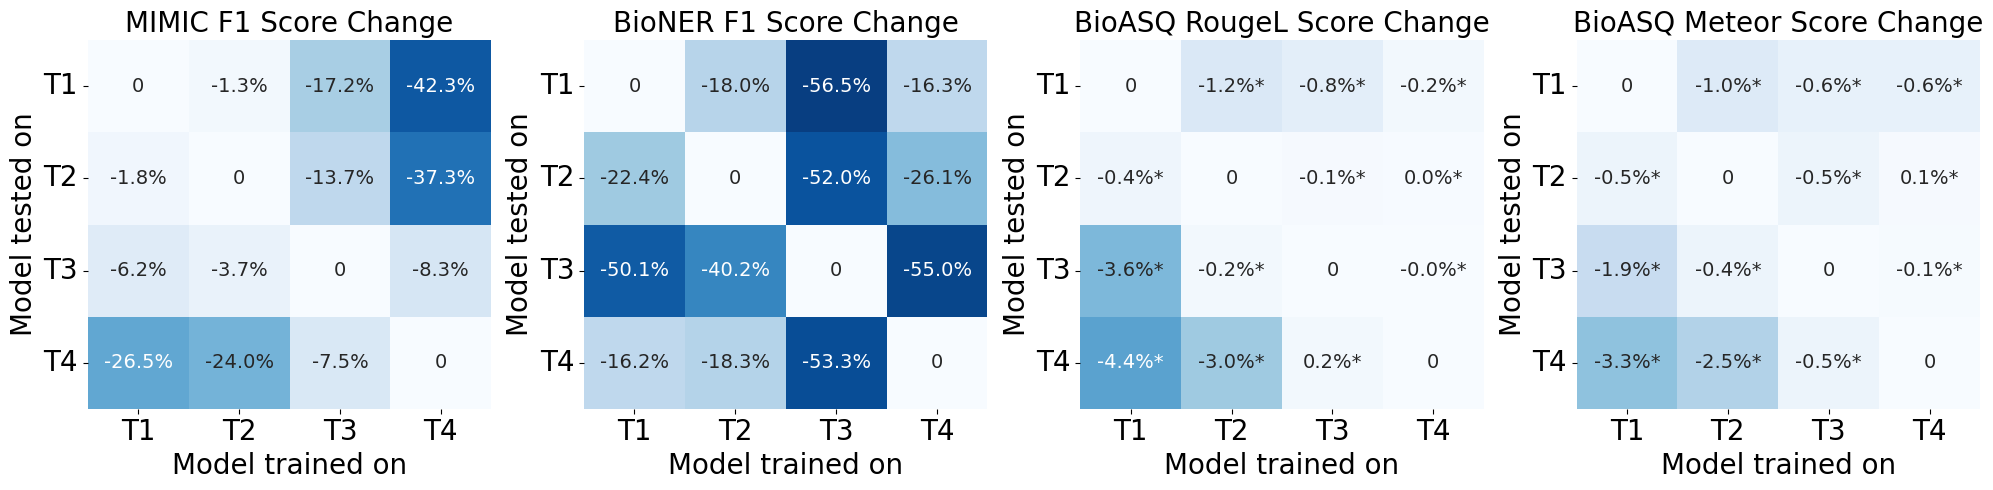

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
# all matrixes to plot


matrices = [
    mimic_performance_change_matrices['predict_micro_f1'],
    bioner_performance_change_matrices['predict_micro_f1'],
    bioasq_performance_change_matrices["rougeL"],
    bioasq_performance_change_matrices["meteor"],
]

titles = [
    "MIMIC F1 Score Change",
    "BioNER F1 Score Change",
    "BioASQ RougeL Score Change", 
    "BioASQ Meteor Score Change",    
]

global_min = min([np.min(np.abs(matrix)) for matrix in matrices])
global_max = max([np.max(np.abs(matrix)) for matrix in matrices])
print(global_min,global_max)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))#figsize=(20, 10)
tick_labels = ['T1', 'T2', 'T3', 'T4']
title_fontsize = 20 # 标题字体大小
axis_label_fontsize = 20  # 轴标签字体大小
tick_label_fontsize = 20
annot_kws={"fontsize": 18}


def percentage_fmt(x):
    if x == 0:
        return "0"
    elif abs(x) < 100:
        return f"{x:.1f}%".lstrip("0").rstrip("0").rstrip(".")
    else:
        return f"{x:.1f}%"

def add_star(x):
    if x == 0:
        return "0"
    elif abs(x) < 5: #5%
        return f"{x:.1f}%*"
    else:
        return f"{x:.1f}%"
    

for i, (matrix, title) in enumerate(zip(matrices, titles)):
    ax = axs[i]
    mask = np.zeros_like(matrix, dtype=bool)
    matrix_percentage = matrix * 100  # 假定矩阵值为小数形式

    if i ==0:  # 对于前两个矩阵
        sns.heatmap(np.abs(matrix), ax=ax, mask=mask, annot=np.vectorize(percentage_fmt)(matrix * 100), fmt='', annot_kws={"fontsize": 14}, cmap='Blues', cbar=False, vmin=0, vmax=0.5)
    elif i==1:
        sns.heatmap(np.abs(matrix), ax=ax, mask=mask, annot=np.vectorize(percentage_fmt)(matrix * 100), fmt='', annot_kws={"fontsize": 14}, cmap='Blues', cbar=False, vmin=0, vmax=0.6)
    
    else:  # 对于后两个矩阵，添加星号
        sns.heatmap(np.abs(matrix), ax=ax, mask=mask, annot=np.vectorize(add_star)(matrix * 100), fmt='', annot_kws={"fontsize": 14}, cmap='Blues', cbar=False, vmin=0, vmax=0.08)

    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xticklabels(tick_labels, rotation=0, fontsize=tick_label_fontsize)
    ax.set_yticklabels(tick_labels, rotation=0, fontsize=tick_label_fontsize)
    ax.set_xlabel('Model trained on', fontsize=axis_label_fontsize)
    ax.set_ylabel('Model tested on', fontsize=axis_label_fontsize)

plt.tight_layout()
plt.savefig("/home/weisi/TemporalAssessment/analysis/pictures/perf_heatmaps_all.pdf", bbox_inches='tight')
plt.show()

In [40]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

def embedding_metrics_matrix(path):
    with open(path, 'r') as file:
        data = json.load(file)
    # Extracting the keys that contain the temporal comparisons
    #keys = [key for key in data.keys() if '_' in key]
    keys=['T1_T1', 'T1_T2', 'T1_T3', 'T1_T4', 'T2_T2', 'T2_T3', 'T2_T4', 'T3_T3', 'T3_T4', 'T4_T4']
    # Create an empty matrix for the distances
    matrix_size = 4
    # Assuming it's a square matrix
    #cosine_similarity_matrix = np.zeros((matrix_size, matrix_size))
    cosine_distance_matrix = np.full((matrix_size, matrix_size), np.nan)
    manhattan_distance_matrix = np.full((matrix_size, matrix_size), np.nan)
    euclidean_distance_matrix = np.full((matrix_size, matrix_size), np.nan)
    # Filling the matrices with the corresponding values
    for key in keys:
        i=int(key[1:].split('_T')[1])
        j=int(key[1:].split('_T')[0])
        cosine_distance_matrix[i-1, j-1] = data[key]['metrics']['cosine_distance']
        manhattan_distance_matrix[i-1, j-1] = data[key]['metrics']['manhattan_distance']
        euclidean_distance_matrix[i-1, j-1] = data[key]['metrics']['euclidean_distance']
        cosine_distance_matrix[j-1, i-1] = data[key]['metrics']['cosine_distance']
        manhattan_distance_matrix[j-1, i-1] = data[key]['metrics']['manhattan_distance']
        euclidean_distance_matrix[j-1, i-1]= data[key]['metrics']['euclidean_distance']

    return cosine_distance_matrix,euclidean_distance_matrix,manhattan_distance_matrix

def token_metrics_matrix(path):
    with open(path, 'r') as file:
        data = json.load(file)
    keys=['T1_T1', 'T1_T2', 'T1_T3', 'T1_T4', 'T2_T2', 'T2_T3', 'T2_T4', 'T3_T3', 'T3_T4', 'T4_T4']
    # Create an empty matrix for the distances
    matrix_size = 4
    matrix = np.full((matrix_size, matrix_size), np.nan)
    for key in keys:
        i=int(key[1:].split('_T')[1])
        j=int(key[1:].split('_T')[0])
        matrix[i-1, j-1] = data[key]
        matrix[j-1, i-1] = data[key]
    return matrix


#df_name='bioasq'
folder_path='/home/weisi/TemporalAssessment/analysis/'

bioasq_jaccard_path=os.path.join(folder_path,'token_metrics','bioasq_jaccard_results.json')
bioasq_tfidf_path=os.path.join(folder_path,'token_metrics','bioasq_cosine_tfidf_of_most_freq_tokens.json')
bioasq_sbert_path=os.path.join(folder_path,'embedding_metrics_and_t-test','bioasq_miniLM_t-test-results.json')
bioasq_simcse_sup_path=os.path.join(folder_path,'embedding_metrics_and_t-test','bioasq_simcse_sup_t-test-results.json')
bioasq_simcse_unsup_path=os.path.join(folder_path,'embedding_metrics_and_t-test','bioasq_simcse_unsup_t-test-results.json')
bioasq_use_path=os.path.join(folder_path,'embedding_metrics_and_t-test','bioasq_use_t-test-results.json')

bioasq_jaccard_matrix=token_metrics_matrix(bioasq_jaccard_path)
bioasq_tfidf_matrix=token_metrics_matrix(bioasq_tfidf_path)
bioasq_sbert_cosine_dist_matrix,_,_=embedding_metrics_matrix(bioasq_sbert_path)
bioasq_simcse_sup_cosine_dist_matrix,bioasq_simcse_sup_euclidean_dist_matrix,bioasq_simcse_sup_manhattan_dist_matrix=embedding_metrics_matrix(bioasq_simcse_sup_path)
bioasq_simcse_unsup_cosine_dist_matrix,bioasq_simcse_unsup_euclidean_dist_matrix,bioasq_simcse_unsup_manhattan_dist_matrix=embedding_metrics_matrix(bioasq_simcse_unsup_path)
bioasq_use_cosine_dist_matrix,bioasq_use_euclidean_dist_matrix,bioasq_use_manhattan_dist_matrix=embedding_metrics_matrix(bioasq_use_path)


mimic_jaccard_path=os.path.join(folder_path,'token_metrics','mimic_jaccard_results.json')
mimic_tfidf_path=os.path.join(folder_path,'token_metrics','mimic_cosine_tfidf_of_most_freq_tokens.json')
mimic_sbert_path=os.path.join(folder_path,'embedding_metrics_and_t-test','mimic_miniLM_t-test-results.json')
mimic_simcse_sup_path=os.path.join(folder_path,'embedding_metrics_and_t-test','mimic_simcse_sup_t-test-results.json')
mimic_simcse_unsup_path=os.path.join(folder_path,'embedding_metrics_and_t-test','mimic_simcse_unsup_t-test-results.json')
mimic_use_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'mimic_use_t-test-results.json')

mimic_jaccard_matrix=token_metrics_matrix(mimic_jaccard_path)
mimic_tfidf_matrix=token_metrics_matrix(mimic_tfidf_path)
mimic_sbert_cosine_dist_matrix,mimic_sbert_euclidean_dist_matrix,mimic_sbert_manhattan_dist_matrix=embedding_metrics_matrix(mimic_sbert_path)
mimic_simcse_sup_cosine_dist_matrix,mimic_simcse_sup_euclidean_dist_matrix,mimic_simcse_sup_manhattan_dist_matrix=embedding_metrics_matrix(mimic_simcse_sup_path)
mimic_simcse_unsup_cosine_dist_matrix,mimic_simcse_unsup_euclidean_dist_matrix,mimic_simcse_unsup_manhattan_dist_matrix=embedding_metrics_matrix(mimic_simcse_unsup_path)
mimic_use_cosine_dist_matrix,mimic_use_euclidean_dist_matrix,mimic_use_manhattan_dist_matrix=embedding_metrics_matrix(mimic_use_path)


bioner_jaccard_path=os.path.join(folder_path,'token_metrics','bioner_jaccard_results.json')
bioner_tfidf_path=os.path.join(folder_path,'token_metrics','bioner_cosine_tfidf_of_most_freq_tokens.json')
bioner_sbert_path=os.path.join(folder_path,'embedding_metrics_and_t-test','bioner_miniLM_t-test-results.json')
bioner_simcse_sup_path=os.path.join(folder_path,'embedding_metrics_and_t-test','bioner_simcse_sup_t-test-results.json')
bioner_simcse_unsup_path=os.path.join(folder_path,'embedding_metrics_and_t-test','bioner_simcse_unsup_t-test-results.json')
bioner_use_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'bioner_use_t-test-results.json')

bioner_jaccard_matrix=token_metrics_matrix(bioner_jaccard_path)
bioner_tfidf_matrix=token_metrics_matrix(bioner_tfidf_path)
bioner_sbert_cosine_dist_matrix,bioner_sbert_euclidean_dist_matrix,bioner_sbert_manhattan_dist_matrix=embedding_metrics_matrix(bioner_sbert_path)
bioner_simcse_sup_cosine_dist_matrix,bioner_simcse_sup_euclidean_dist_matrix,bioner_simcse_sup_manhattan_dist_matrix=embedding_metrics_matrix(bioner_simcse_sup_path)
bioner_simcse_unsup_cosine_dist_matrix,bioner_simcse_unsup_euclidean_dist_matrix,bioner_simcse_unsup_manhattan_dist_matrix=embedding_metrics_matrix(bioner_simcse_unsup_path)
bioner_use_cosine_dist_matrix,bioner_use_euclidean_dist_matrix,bioner_use_manhattan_dist_matrix=embedding_metrics_matrix(bioner_use_path)

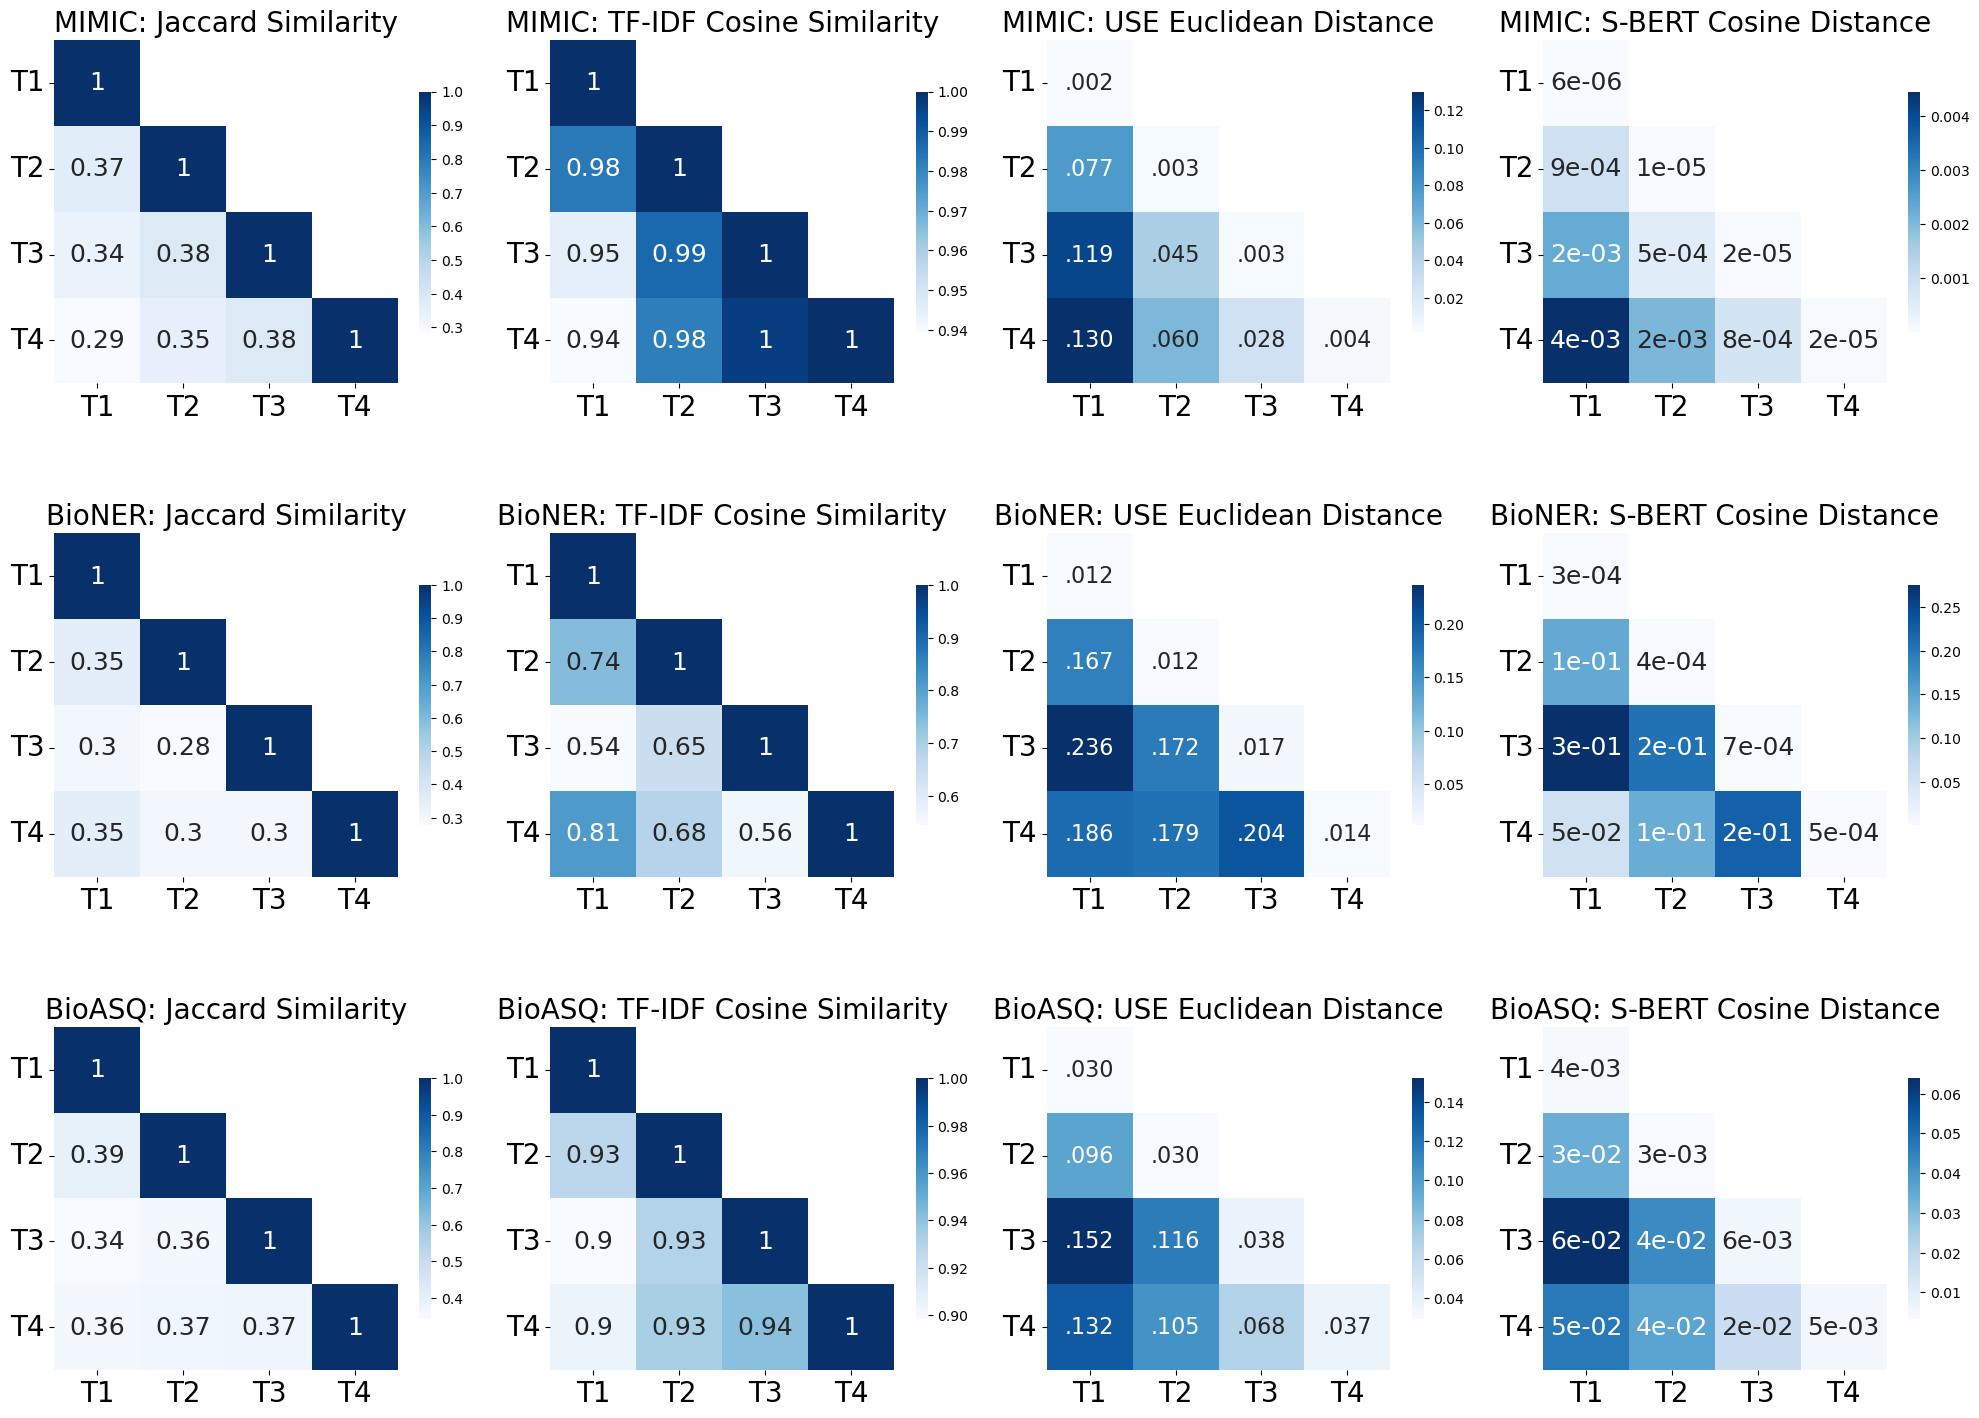

In [50]:

matrices_list = [
    mimic_jaccard_matrix,
    mimic_tfidf_matrix,
    mimic_use_euclidean_dist_matrix,
    mimic_sbert_cosine_dist_matrix,
    
    bioner_jaccard_matrix,
    bioner_tfidf_matrix,
    bioner_use_euclidean_dist_matrix,
    bioner_sbert_cosine_dist_matrix,

    bioasq_jaccard_matrix,
    bioasq_tfidf_matrix,
    bioasq_use_euclidean_dist_matrix,
    bioasq_sbert_cosine_dist_matrix,

]


matrices_names = [
    "MIMIC: Jaccard Similarity",    
    "MIMIC: TF-IDF Cosine Similarity",
    "MIMIC: USE Euclidean Distance",
    "MIMIC: S-BERT Cosine Distance",    
   
    "BioNER: Jaccard Similarity",    
    "BioNER: TF-IDF Cosine Similarity",
    "BioNER: USE Euclidean Distance",
    "BioNER: S-BERT Cosine Distance",    
   
    "BioASQ: Jaccard Similarity",    
    "BioASQ: TF-IDF Cosine Similarity",
    "BioASQ: USE Euclidean Distance",
    "BioASQ: S-BERT Cosine Distance",      
]


fig, axs = plt.subplots(3, 4, figsize=(20, 15))
tick_labels = ['T1', 'T2', 'T3', 'T4']
title_fontsize = 20 # 标题字体大小
axis_label_fontsize = 20  # 轴标签字体大小
tick_label_fontsize = 20
annot_kws={"fontsize": 18}

def remove_zero(x):
    if x == 0:
        return "0"
    elif abs(x) < 1:
        return f"{x:.3f}".replace("0.", ".").replace("-0.", "-.")
    else:
        return f"{x:.3f}"
    
    
#vlag  RdBu Blues coolwarm YlGnBu
for i, (matrix, title) in enumerate(zip(matrices_list, matrices_names)):

    ax = axs[i // 4, i % 4] 
    mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
    if i % 4 <2:  
        sns.heatmap(matrix, ax=ax, mask=mask, annot=True, cmap='Blues', square=True, cbar=True, cbar_kws={'shrink': .5},annot_kws=annot_kws)
        # use abs value to fill color
        #sns.heatmap(np.abs(matrix), ax=ax, mask=mask, annot=matrix, cmap='Blues', square=True, cbar=False) #, xticklabels=tick_labels, yticklabels=tick_labels)
    elif i % 4 == 2: #second col Jaccard and tfidf
        sns.heatmap(np.abs(matrix), ax=ax, mask=mask, fmt='',annot=np.vectorize(remove_zero)(matrix), cmap='Blues', square=True, cbar=True, cbar_kws={'shrink': .5},annot_kws={"fontsize": 16})        
    else: 
        sns.heatmap(matrix, ax=ax, mask=mask, fmt='',annot=np.vectorize(lambda x: f"{x:.0e}")(matrix), cbar=True, cmap='Blues', square=True, cbar_kws={'shrink': .5},annot_kws=annot_kws)
    
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xticklabels(tick_labels, rotation=0, fontsize=tick_label_fontsize)
    ax.set_yticklabels(tick_labels, rotation=0, fontsize=tick_label_fontsize)


plt.tight_layout()
plt.savefig("/home/weisi/TemporalAssessment/analysis/pictures/heatmaps/dist_heatmaps_all_cbar.pdf", bbox_inches='tight')
plt.show()



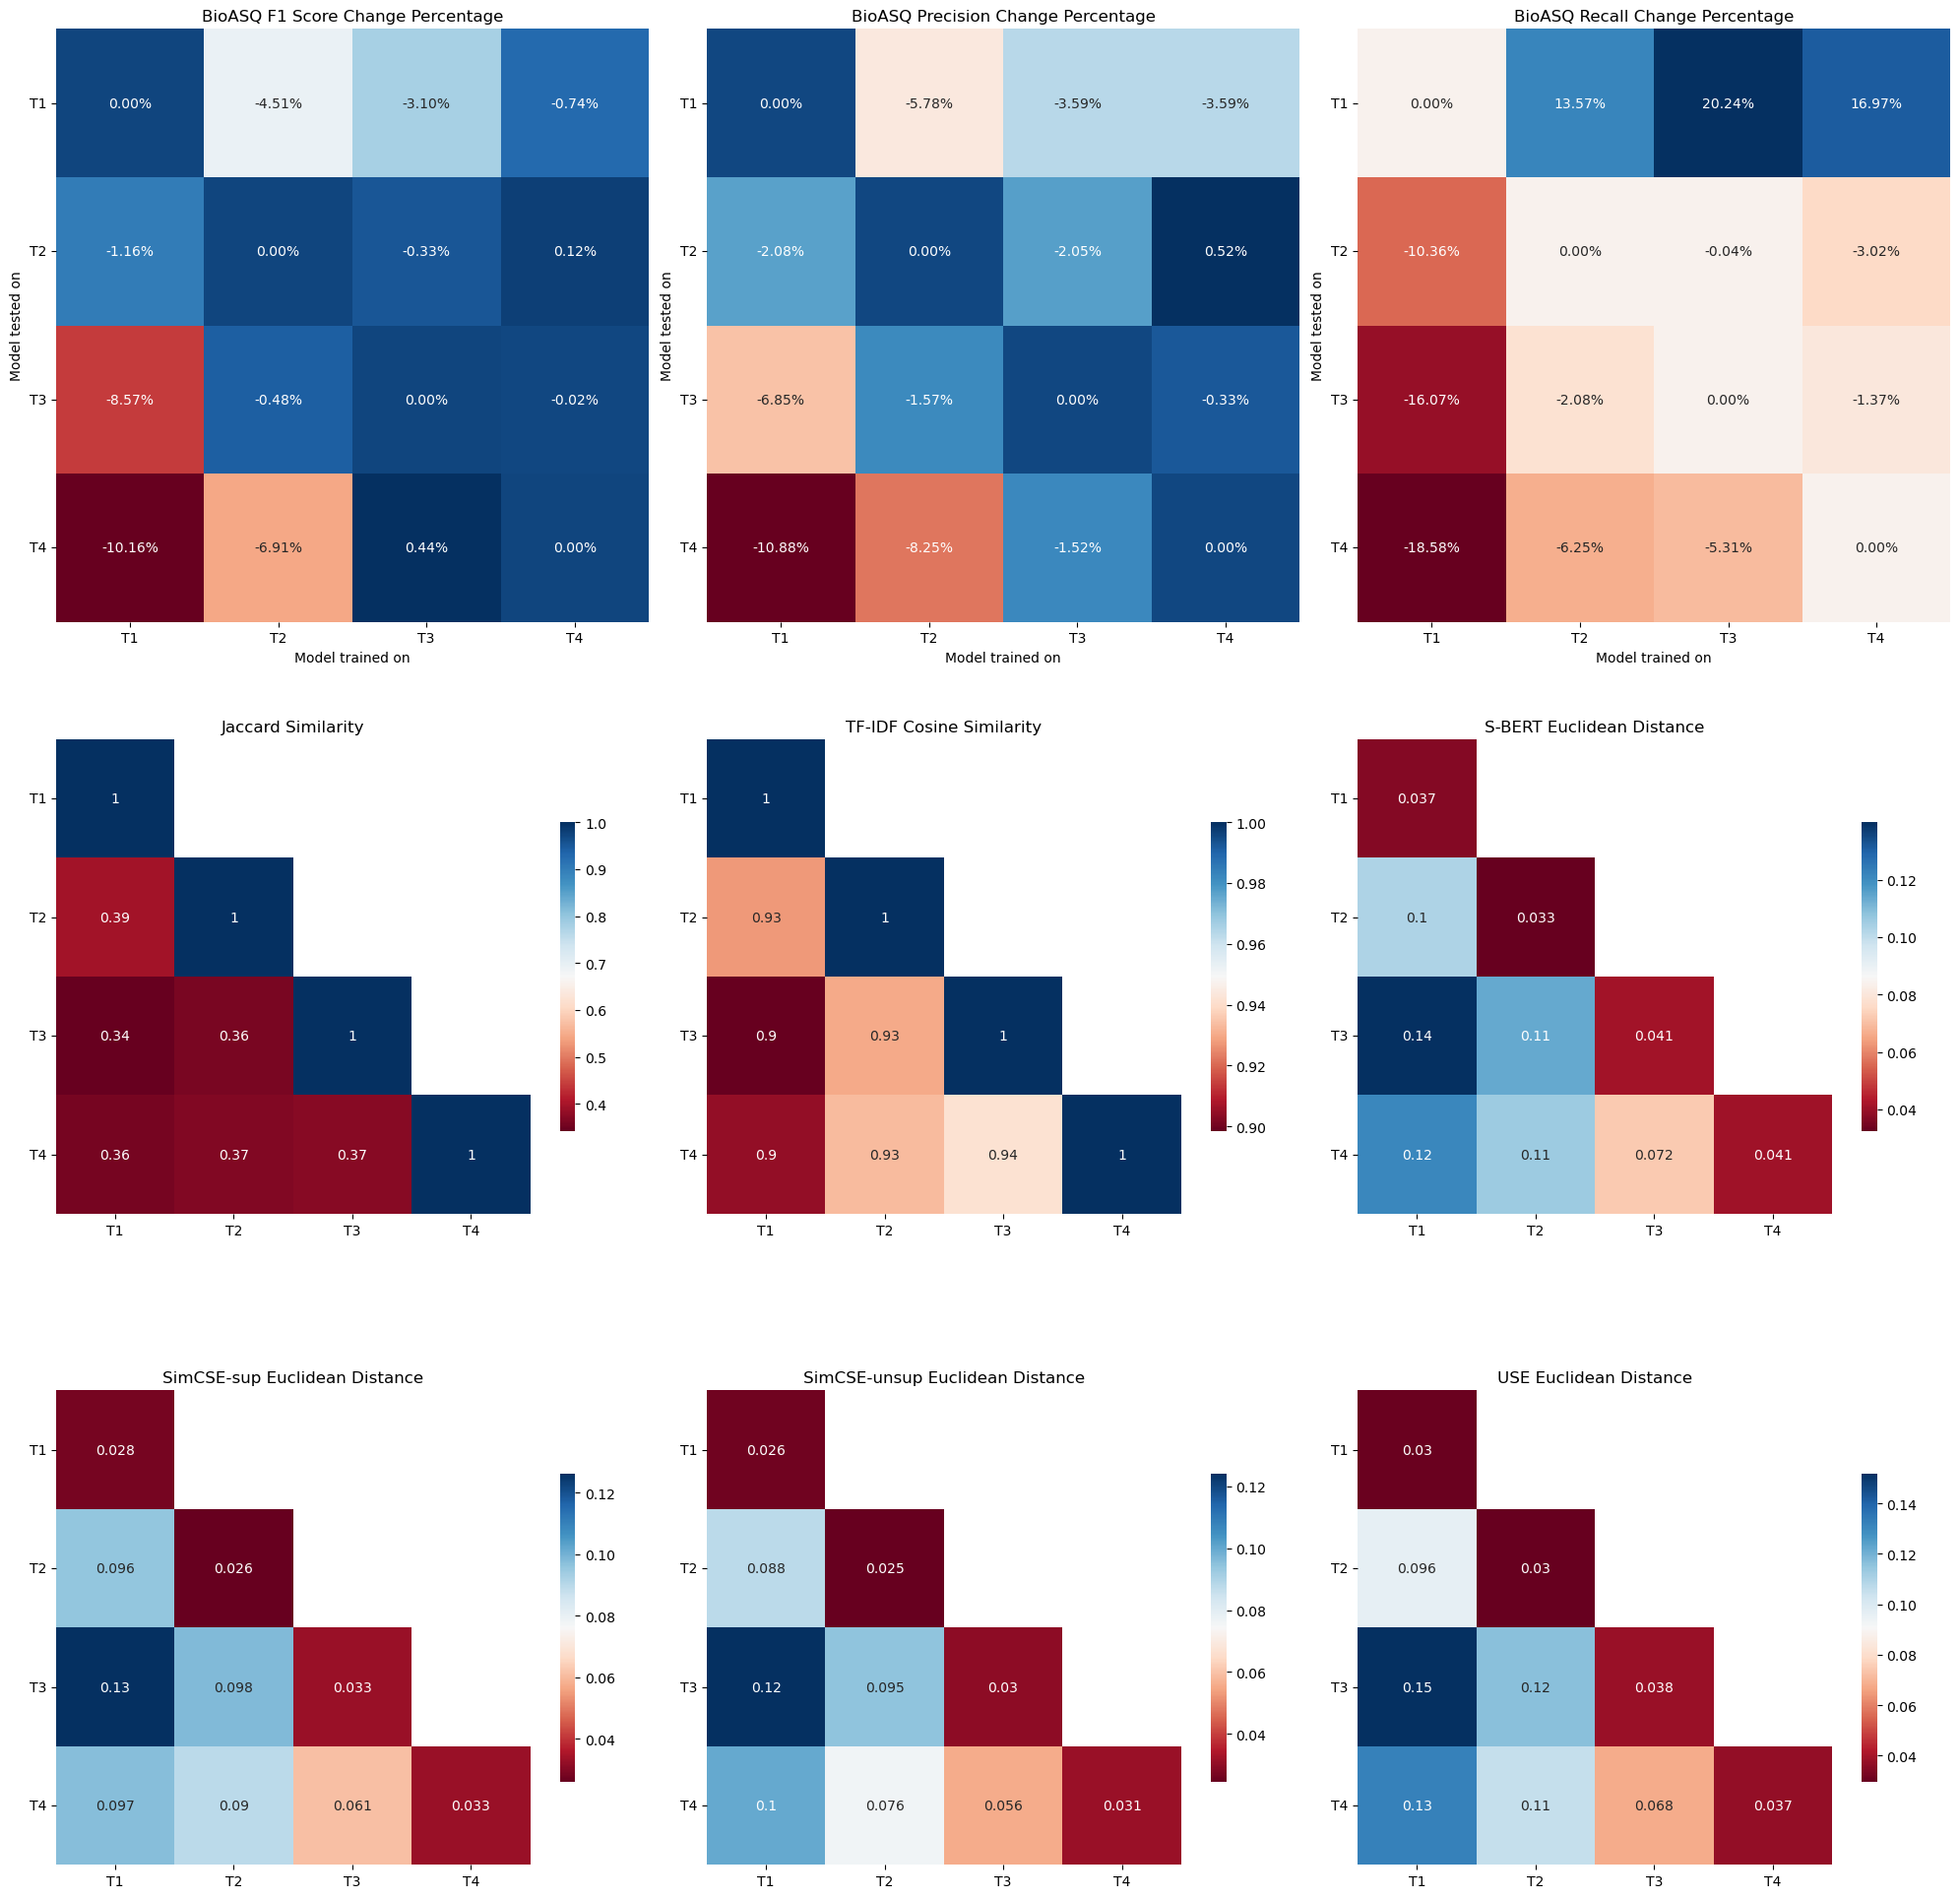

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
# all matrixes to plot
'''performance_change_percentage_matrices["rougeL"],
    performance_change_percentage_matrices["meteor"],
    performance_change_percentage_matrices["Geometric_Average_Precision"],'''
'''performance_change_matrices["rougeL"],
    performance_change_matrices["meteor"],
    performance_change_matrices["Geometric_Average_Precision"]'''
matrices = [
    performance_change_percentage_matrices["rougeL"],
    performance_change_percentage_matrices["meteor"],
    performance_change_percentage_matrices["Geometric_Average_Precision"],
    jaccard_matrix,
    tfidf_matrix,
    #sbert_cosine_dist_matrix,
    sbert_euclidean_dist_matrix,
    #sbert_manhattan_dist_matrix,
    #simcse_sup_cosine_dist_matrix,
    simcse_sup_euclidean_dist_matrix,
    #simcse_sup_manhattan_dist_matrix,
    #simcse_unsup_cosine_dist_matrix,
    simcse_unsup_euclidean_dist_matrix,
    #simcse_unsup_manhattan_dist_matrix,
    #use_cosine_dist_matrix,
    use_euclidean_dist_matrix,
    #use_manhattan_dist_matrix,
]

titles = [
    "BioASQ RougeL Change Percentage", 
    "BioASQ Meteor Change Percentage",
    "BioASQ GAP Score Change Percentage",
    "Jaccard Similarity",
    "TF-IDF Cosine Similarity",
    #"S-BERT Cosine Distance",
    "S-BERT Euclidean Distance",
    #"S-BERT Manhattan Distance",
    #"SimCSE-sup Cosine Distance",
    "SimCSE-sup Euclidean Distance",
    #"SimCSE-sup Manhattan Distance",
    #"SimCSE-unsup Cosine Distance",
    "SimCSE-unsup Euclidean Distance",
    #"SimCSE-unsup Manhattan Distance",
    #"USE Cosine Distance",
    "USE Euclidean Distance",
    #"USE Manhattan Distance",
]

# 2*4 subplots
# Get the coolwarm colormap
coolwarm = plt.get_cmap('coolwarm')

# Create a lighter version of the coolwarm colormap
light_coolwarm = mcolors.LinearSegmentedColormap.from_list(
    name='light_coolwarm',
    colors=[coolwarm(i) for i in range(coolwarm.N)],
    N=coolwarm.N
)

# Modify the colormap to make it lighter by blending with white
light_coolwarm_colors = light_coolwarm(np.arange(coolwarm.N))
light_coolwarm_colors[:, :-1] += 0.3 * (1 - light_coolwarm_colors[:, :-1])  # Lighten color
light_coolwarm = mcolors.ListedColormap(light_coolwarm_colors)

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
tick_labels = ['T1', 'T2', 'T3', 'T4']

#vlag  RdBu Blues coolwarm YlGnBu
for i, (matrix, title) in enumerate(zip(matrices, titles)):

    ax = axs[i // 3, i % 3] 
    if i < 3:  # for performance change matrix
        mask = np.zeros_like(matrix, dtype=bool)
        # use abs value to fill color
        #sns.heatmap(np.abs(matrix), ax=ax, mask=mask, annot=matrix, cmap='Blues', square=True, cbar=False) #, xticklabels=tick_labels, yticklabels=tick_labels)
        #sns.heatmap(matrix, ax=ax, mask=mask, annot=matrix, cmap='Blues', square=True, cbar=False)
        sns.heatmap(matrix, ax=ax,mask=mask,fmt='', cmap='RdBu', annot= np.vectorize(lambda x: f"{x:.2f}%")(matrix * 100), square=True, cbar=False) 
        # set x y -labels for sub plot
        ax.set_xlabel('Model trained on')
        ax.set_ylabel('Model tested on')
    else:  # for metrics
        mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
        sns.heatmap(matrix, ax=ax, mask=mask, annot=True, cmap='RdBu', square=True, cbar_kws={'shrink': .5})
    
    ax.set_title(title)
    ax.set_xticklabels(tick_labels, rotation=0)
    ax.set_yticklabels(tick_labels, rotation=0)

plt.tight_layout()
plt.savefig("/home/weisi/TemporalAssessment/analysis/pictures/BioASQ_perf_change_percentage_9_heatmaps_RdBu.pdf", bbox_inches='tight')
plt.show()

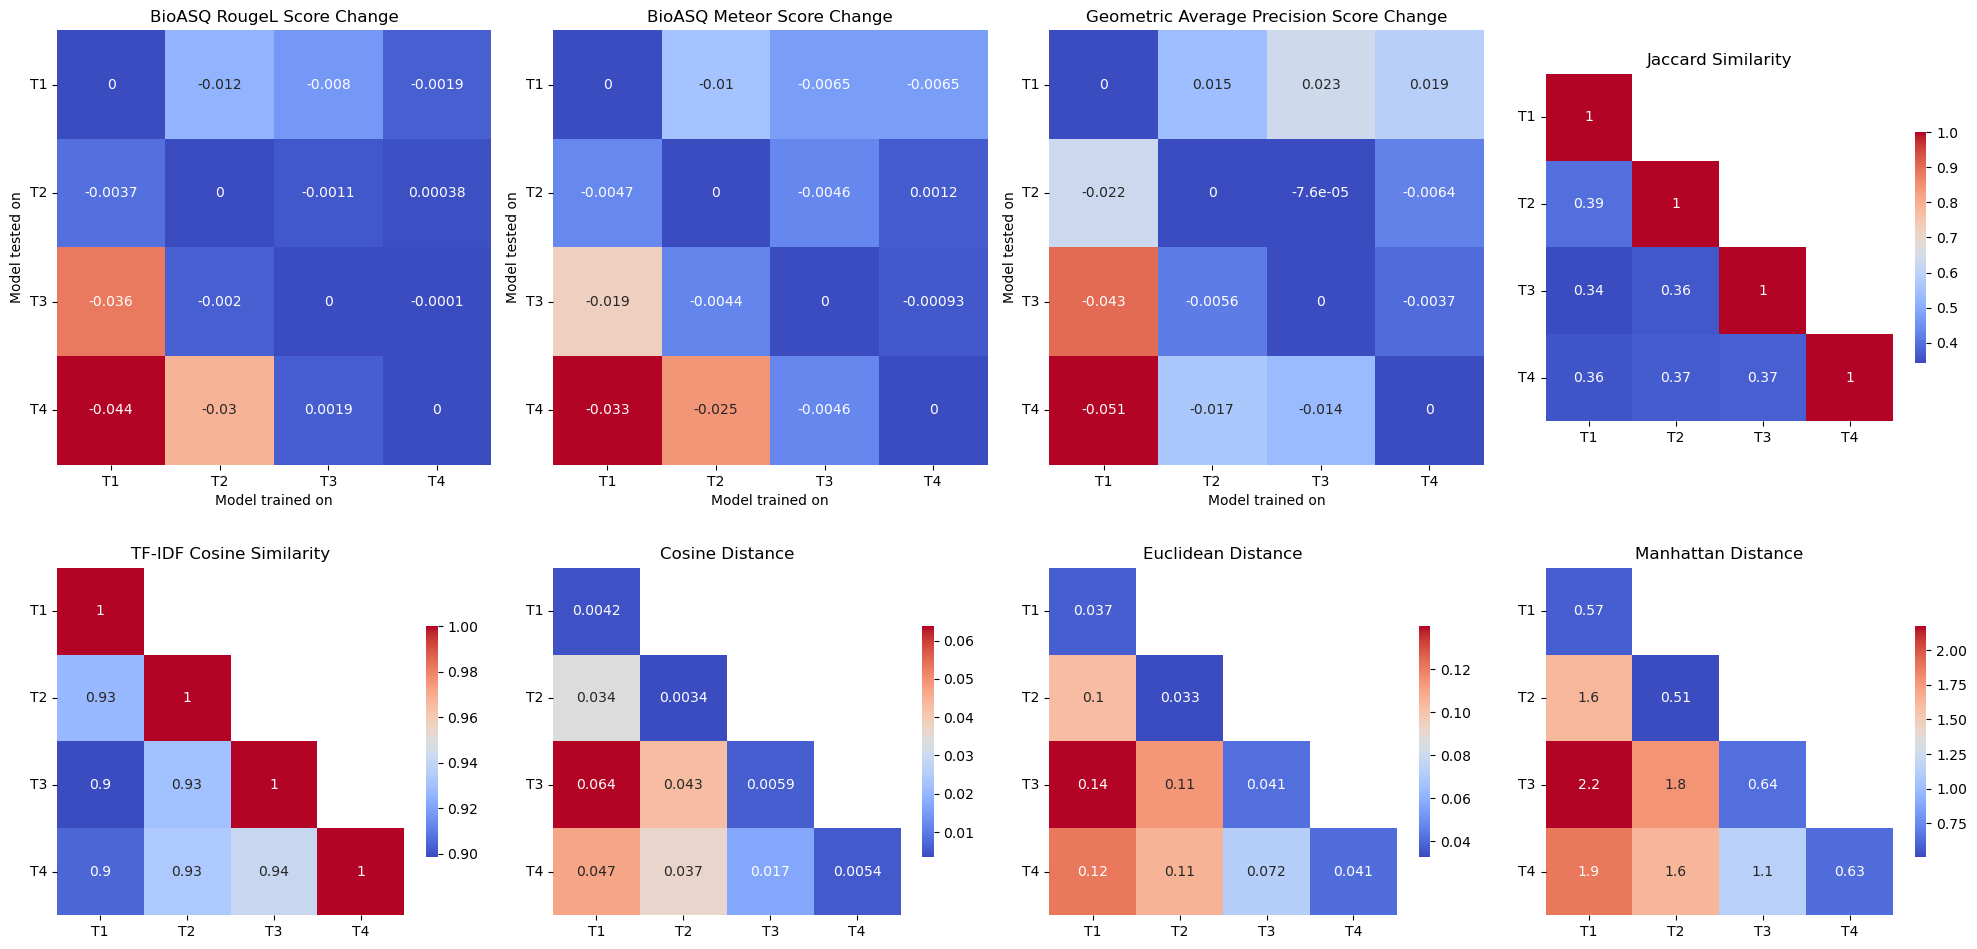

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# all matrixes to plot
matrices = [
    performance_change_matrices["rougeL"],
    performance_change_matrices["meteor"],
    performance_change_matrices["Geometric_Average_Precision"],
    jaccard_matrix,
    tfidf_matrix,
    cosine_dist_matrix2,
    euclidean_dist_matrix2,
    manhattan_dist_matrix2
]

# "Performance Change: F1", BioNER Dataset - F1 Score Change
titles = [
    "BioASQ RougeL Score Change", 
    "BioASQ Meteor Score Change",
    "Geometric Average Precision Score Change",
    "Jaccard Similarity",
    "TF-IDF Cosine Similarity",
    "Cosine Distance",
    "Euclidean Distance",
    "Manhattan Distance"
]
'''titles = [
    "BioASQ Performance Change: RougeL", 
    "BioASQ Performance Change: Meteor",
    "BioASQ Performance Change: Geometric Average Precision",
    "Jaccard Similarity",
    "TF-IDF Cosine Similarity",
    "Cosine Distance",
    "Euclidean Distance",
    "Manhattan Distance"
]'''

# 2*4 subplots

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
tick_labels = ['T1', 'T2', 'T3', 'T4']

for i, (matrix, title) in enumerate(zip(matrices, titles)):
    ax = axs[i // 4, i % 4] 
    if i < 3:  # for performance change matrix
        mask = np.zeros_like(matrix, dtype=bool)
        # use abs value to fill color
        sns.heatmap(np.abs(matrix), ax=ax, mask=mask, annot=matrix, cmap='coolwarm', square=True, cbar=False) #, xticklabels=tick_labels, yticklabels=tick_labels)
        # set x y -labels for sub plot
        ax.set_xlabel('Model trained on')
        ax.set_ylabel('Model tested on')
    else:  # for metrics
        mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
        sns.heatmap(matrix, ax=ax, mask=mask, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .5})
    
    ax.set_title(title)
    ax.set_xticklabels(tick_labels, rotation=0)
    ax.set_yticklabels(tick_labels, rotation=0)


plt.tight_layout()
plt.savefig("/home/weisi/TemporalAssessment/analysis/pictures/BioASQ_perf_change_heatmaps.pdf", bbox_inches='tight')
#plt.savefig("output_figure.pdf", bbox_inches='tight')
plt.show()


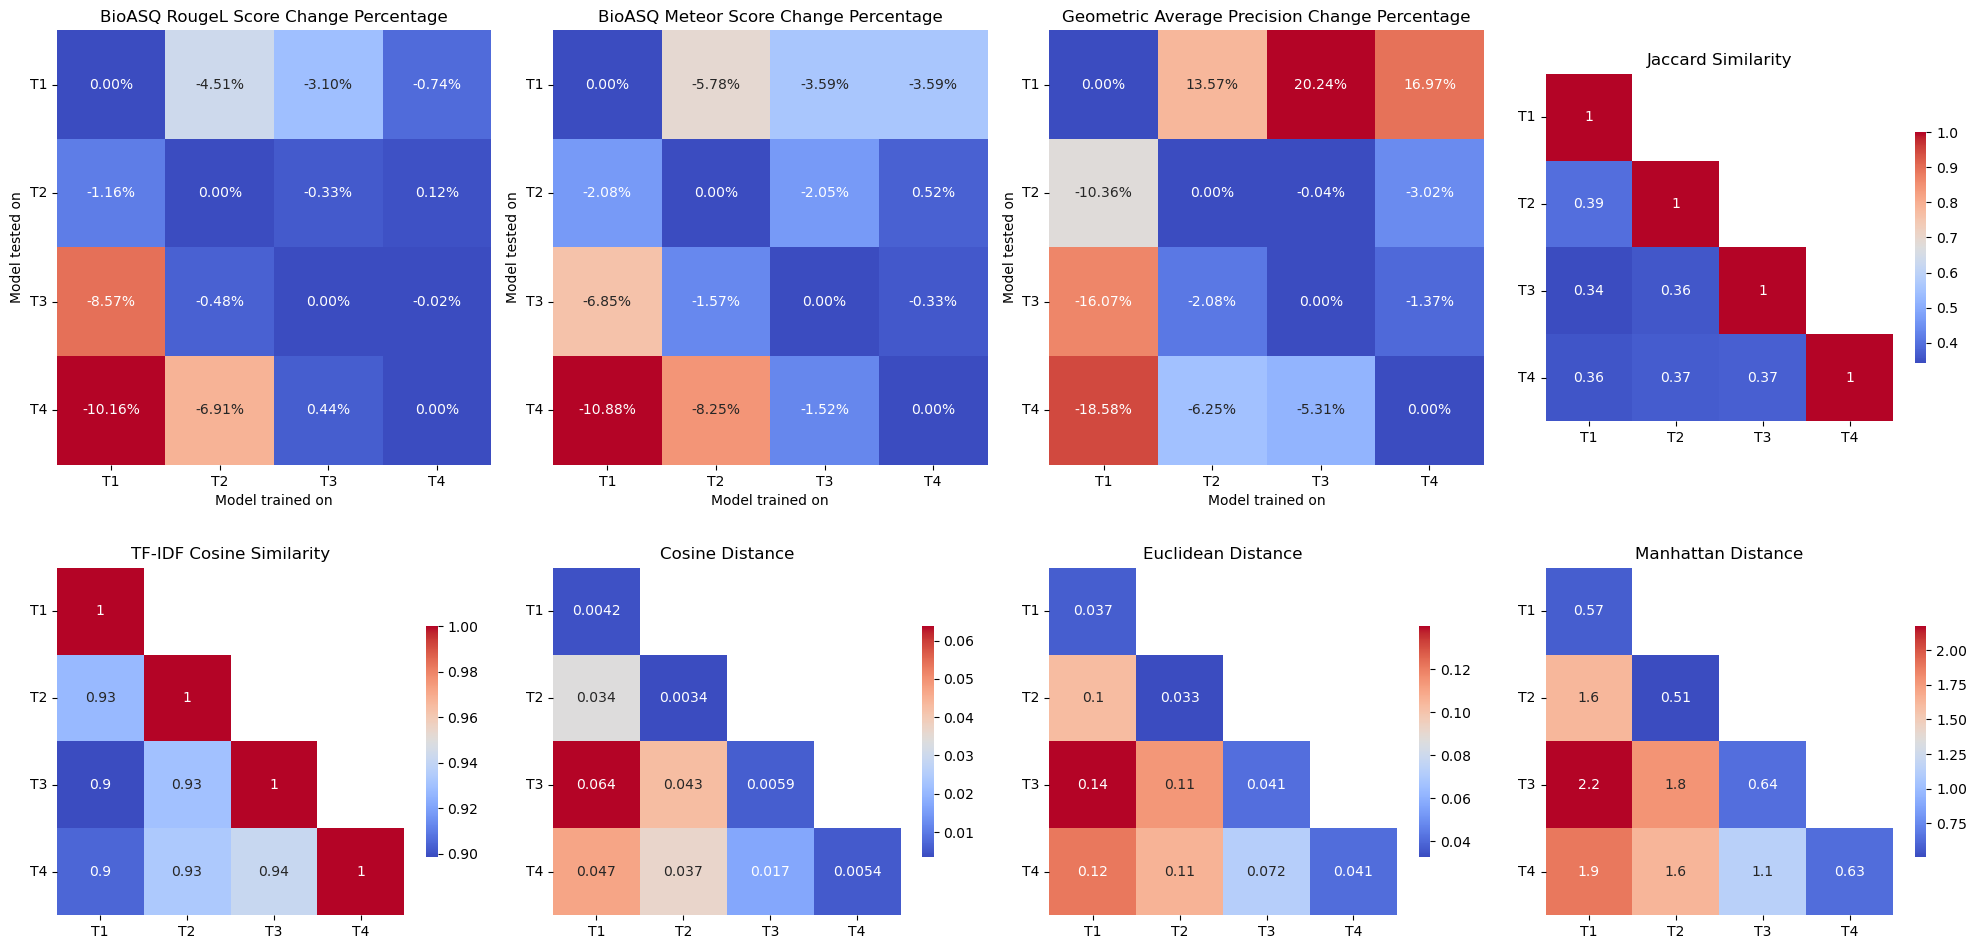

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# all matrixes to plot
# all matrixes to plot
matrices = [
    performance_change_percentage_matrices["rougeL"],
    performance_change_percentage_matrices["meteor"],
    performance_change_percentage_matrices["Geometric_Average_Precision"],
    jaccard_matrix,
    tfidf_matrix,
    cosine_dist_matrix2,
    euclidean_dist_matrix2,
    manhattan_dist_matrix2
]

# "Performance Change: F1", BioNER Dataset - F1 Score Change
titles = [
    "BioASQ RougeL Score Change Percentage", 
    "BioASQ Meteor Score Change Percentage",
    "Geometric Average Precision Change Percentage",
    "Jaccard Similarity",
    "TF-IDF Cosine Similarity",
    "Cosine Distance",
    "Euclidean Distance",
    "Manhattan Distance"
]

# 2*4 subplots

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
tick_labels = ['T1', 'T2', 'T3', 'T4']

for i, (matrix, title) in enumerate(zip(matrices, titles)):
    ax = axs[i // 4, i % 4] 
    if i < 3:  # for performance change matrix
        mask = np.zeros_like(matrix, dtype=bool)
        # use abs value to fill color
        sns.heatmap(np.abs(matrix), ax=ax,mask=mask,fmt='', annot= np.vectorize(lambda x: f"{x:.2f}%")(matrix * 100), cmap='coolwarm', square=True, cbar=False) #, xticklabels=tick_labels, yticklabels=tick_labels)
        # set x y -labels for sub plot
        ax.set_xlabel('Model trained on')
        ax.set_ylabel('Model tested on')
    else:  # for metrics
        mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
        sns.heatmap(matrix, ax=ax, mask=mask, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .5})
    
    ax.set_title(title)
    ax.set_xticklabels(tick_labels, rotation=0)
    ax.set_yticklabels(tick_labels, rotation=0)

plt.tight_layout()

plt.savefig("/home/weisi/TemporalAssessment/analysis/pictures/BioASQ_perf_change_parcentage.pdf", bbox_inches='tight')
plt.show()


In [27]:
# performance_matrices = {'f1': predict_micro_f1_matrix, 'precision': predict_micro_precision_matrix, 'recall': predict_micro_recall_matrix}
from scipy.stats import pearsonr
# matrix 2 vector

jaccard_vec = jaccard_matrix.flatten()
tfidf_vec = tfidf_matrix.flatten()

sbert_cos = sbert_cosine_dist_matrix.flatten()
sbert_euc = sbert_euclidean_dist_matrix.flatten()
sbert_man = sbert_manhattan_dist_matrix.flatten()

simcse_sup_cos = simcse_sup_cosine_dist_matrix.flatten()
simcse_sup_euc = simcse_sup_euclidean_dist_matrix.flatten()
simcse_sup_man = simcse_sup_manhattan_dist_matrix.flatten()

simcse_unsup_cos = simcse_unsup_cosine_dist_matrix.flatten()
simcse_unsup_euc= simcse_unsup_euclidean_dist_matrix.flatten()
simcse_unsup_man = simcse_unsup_manhattan_dist_matrix.flatten()
        
use_cos = use_cosine_dist_matrix.flatten()
use_euc = use_euclidean_dist_matrix.flatten()
use_man = use_manhattan_dist_matrix.flatten()
        
# performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}

dist_vecs = {
    'jaccard_vec':jaccard_vec,
    'tfidf_vec':tfidf_vec,
    'sbert_cos': sbert_cos,
    'sbert_euc': sbert_euc,
    'sbert_man': sbert_man,
    'simcse_sup_cos': simcse_sup_cos,
    'simcse_sup_euc': simcse_sup_euc,
    'simcse_sup_man': simcse_sup_man,
    'simcse_unsup_cos': simcse_unsup_cos,
    'simcse_unsup_euc': simcse_unsup_euc,
    'simcse_unsup_man': simcse_unsup_man,
    'use_cos': use_cos,
    'use_euc': use_euc,
    'use_man': use_man,
    # Add other vectors here
}

# Calculate correlation matrix with p-values
correlation_matrix = {}
p_value_matrix = {}
'''performance_change_percentage_vecs'''
'''performance_change_vecs'''
for metric, perf_vec in performance_change_vecs.items():
    correlations = {}
    p_values = {}
    for comp_metric, comp_perf_vec in dist_vecs.items():
        r_value, p_value = pearsonr(perf_vec, comp_perf_vec)
        correlations[comp_metric] = r_value
        p_values[comp_metric] = p_value
    correlation_matrix[metric] = correlations
    p_value_matrix[metric] = p_values

# Print correlation matrix with p-values
for metric, correlations in correlation_matrix.items():
    print(f"{metric} performance correlations with:")
    for comp_metric, r_value in correlations.items():
        p_value = p_value_matrix[metric][comp_metric]
        print(f"{comp_metric}: r = {r_value:.2f}, p = {p_value:.4f}")
    print("\n")


rougeL performance correlations with:
jaccard_vec: r = 0.36, p = 0.1688
tfidf_vec: r = 0.51, p = 0.0456
sbert_cos: r = -0.54, p = 0.0300
sbert_euc: r = -0.52, p = 0.0387
sbert_man: r = -0.52, p = 0.0409
simcse_sup_cos: r = -0.50, p = 0.0477
simcse_sup_euc: r = -0.50, p = 0.0512
simcse_sup_man: r = -0.49, p = 0.0518
simcse_unsup_cos: r = -0.52, p = 0.0408
simcse_unsup_euc: r = -0.51, p = 0.0442
simcse_unsup_man: r = -0.51, p = 0.0426
use_cos: r = -0.53, p = 0.0347
use_euc: r = -0.54, p = 0.0292
use_man: r = -0.55, p = 0.0283


meteor performance correlations with:
jaccard_vec: r = 0.45, p = 0.0767
tfidf_vec: r = 0.56, p = 0.0240
sbert_cos: r = -0.54, p = 0.0299
sbert_euc: r = -0.55, p = 0.0271
sbert_man: r = -0.55, p = 0.0283
simcse_sup_cos: r = -0.49, p = 0.0566
simcse_sup_euc: r = -0.51, p = 0.0425
simcse_sup_man: r = -0.51, p = 0.0421
simcse_unsup_cos: r = -0.50, p = 0.0500
simcse_unsup_euc: r = -0.52, p = 0.0370
simcse_unsup_man: r = -0.53, p = 0.0356
use_cos: r = -0.53, p = 0.0349


In [60]:
# compute pearson correlation_matrix
correlation_matrix = {}

for metric, perf_vec in performance_change_vecs.items():
    correlations = {
        'jaccard': np.corrcoef(perf_vec, jaccard_vec)[0, 1],
        'tfidf': np.corrcoef(perf_vec, tfidf_vec)[0, 1],
        'cosine_dist': np.corrcoef(perf_vec, cosine_dist_vec)[0, 1],
        'euclidean_dist': np.corrcoef(perf_vec, euclidean_dist_vec)[0, 1],
        'manhattan_dist': np.corrcoef(perf_vec, manhattan_dist_vec)[0, 1]
    }
    correlation_matrix[metric] = correlations

# 
for metric, correlations in correlation_matrix.items():
    print(f"{metric} Performance Change Correlations with:")
    for key, value in correlations.items():
        print(f"{key}: {value}")
    print("\n")

rougeL Performance Change Correlations with:
jaccard: 0.36161220122734206
tfidf: 0.505911948543265
cosine_dist: -0.5423518144664766
euclidean_dist: -0.5206232364587841
manhattan_dist: -0.5156631004264838


meteor Performance Change Correlations with:
jaccard: 0.45482992421476154
tfidf: 0.560314154473286
cosine_dist: -0.5424688442772757
euclidean_dist: -0.5506264811142304
manhattan_dist: -0.5469614183616271


Geometric_Average_Precision Performance Change Correlations with:
jaccard: 0.20426046173828427
tfidf: 0.22035171309526252
cosine_dist: -0.18483993600676202
euclidean_dist: -0.1946584652090381
manhattan_dist: -0.19248150580786033




In [61]:
# compute pearson correlation_matrix
correlation_matrix = {}

for metric, perf_vec in performance_change_percentage_vecs.items():
    correlations = {
        'jaccard': np.corrcoef(perf_vec, jaccard_vec)[0, 1],
        'tfidf': np.corrcoef(perf_vec, tfidf_vec)[0, 1],
        'cosine_dist': np.corrcoef(perf_vec, cosine_dist_vec)[0, 1],
        'euclidean_dist': np.corrcoef(perf_vec, euclidean_dist_vec)[0, 1],
        'manhattan_dist': np.corrcoef(perf_vec, manhattan_dist_vec)[0, 1]
    }
    correlation_matrix[metric] = correlations

# 
for metric, correlations in correlation_matrix.items():
    print(f"{metric} Performance change percentage correlations with:")
    for key, value in correlations.items():
        print(f"{key}: {value}")
    print("\n")

rougeL Performance change percentage correlations with:
jaccard: 0.3951070153817092
tfidf: 0.550723111840508
cosine_dist: -0.5868266618889316
euclidean_dist: -0.5652679481750428
manhattan_dist: -0.5617561665698585


meteor Performance change percentage correlations with:
jaccard: 0.5106930448542085
tfidf: 0.6377908590189086
cosine_dist: -0.6187525533641807
euclidean_dist: -0.6271610009049703
manhattan_dist: -0.62552673120149


Geometric_Average_Precision Performance change percentage correlations with:
jaccard: 0.042685185775368756
tfidf: -0.010329114961437711
cosine_dist: 0.04369277587087268
euclidean_dist: 0.023625867055814063
manhattan_dist: 0.025624438141707177




In [33]:
import statsmodels.api as sm


perf_metric = 'rougeL'  
perf_vec = performance_matrices[perf_metric].flatten()

# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec, euclidean_dist_vec, manhattan_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model = sm.OLS(perf_vec, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                 -0.148
Method:                 Least Squares   F-statistic:                    0.6139
Date:                Thu, 07 Mar 2024   Prob (F-statistic):              0.692
Time:                        16:03:31   Log-Likelihood:                 22.059
No. Observations:                  16   AIC:                            -32.12
Df Residuals:                      10   BIC:                            -27.48
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0078      3.101     -0.325      0.7

/home/weisi/anaconda3/envs/tempo0/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [34]:
import statsmodels.api as sm


perf_metric = 'rougeL'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec, euclidean_dist_vec, manhattan_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())




                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       10
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        16:04:36                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8868      0.333     -2.662      0.0

In [36]:
import statsmodels.api as sm


perf_metric = 'rougeL'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       12
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        16:05:02                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6549      0.177     -3.696      0.0

In [37]:
import statsmodels.api as sm


perf_metric = 'meteor'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec, euclidean_dist_vec, manhattan_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())



                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       10
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        16:05:33                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3807      0.272     -1.400      0.1

In [38]:
import statsmodels.api as sm


perf_metric = 'meteor'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())



                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       12
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        16:05:55                                         
No. Iterations:                    33                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3714      0.225     -1.651      0.0

In [39]:
import statsmodels.api as sm


perf_metric = 'Geometric_Average_Precision'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())



                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       12
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        16:06:38                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1576      0.697     -0.226      0.8